### Examen extraordinario 2023-II-Trujillo
Link: https://unitru.edu.pe/webfiles///Convocatoria/2023/2//69_DOC_CONVO_110220230631.txt

El conjunto de datos corresponde al proceso de admisión a la Universidad Nacional de Trujillo (UNT) del período 2023-II aplicado en la sede de Trujillo. Existen diversas modalidades de acceso a la casa de estudios, una de ellas corresponde a la modalidad extraordinaria, la cual se ha considerado para el estudio y análisis del presente trabajo. El examen comprende 100 preguntas divididas en las dos siguientes secciones: aptitud académica y conocimiento. Cada pregunta contestada correctamente le corresponde +4 puntos; incorrectamente, -1; no contestada, 0 puntos. En esta oportunidad, se han presentado 550 postulantes a las diversas escuelas de la UNT.

Los campos del conjunto de datos son los siguientes:
1. ID: Identificador único
2. Apellidos y Nombres (categórico)
3. Puntaje aptitud académica (cuantitativo)
4. Puntaje de conocimiento (cuantitativo)
5. Puntaje total (cuantitativo)
6. Nota mínima (cuantitativo)
7. Escuela (categórico)
8. Observación: Ingresa o No Ingresa (categórico)

Cuestiones de interés:
+ El cómputo general del proceso de admisión de modalidad extraordinaria.
+ Obtener una tabla que muestre la cantidad de postulantes por escuela, la proporción de ingresantes y no ingresantes.

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
url = "https://raw.githubusercontent.com/williamra02/Datasets/main/Examen%20Extraordinario%202023-II-Trujillo.csv?token=GHSAT0AAAAAACJX2NPQ5A7YXJHXH6U3IV2WZKCYHFA"
df = pd.read_csv(url, encoding='unicode_escape', sep=';')
df

,ID,APELLIDOS Y NOMBRES,PTJE APT ACADEM,PTJE CONOC.,PTJE TOTAL,NOTA MINIMA,ESCUELA,OBSERVACION
0,2968,CORDOVA POLO ANGIE ELIZABETH,77.324,87.676,165.000,90.511,ADMINISTRACION,INGRESA
1,4577,CHACON ESCOBEDO GREICY LISET,40.688,90.734,131.422,90.511,ADMINISTRACION,INGRESA
2,6472,AVILA CABANILLAS MARC ANYELO,31.529,95.844,127.373,90.511,ADMINISTRACION,INGRESA
3,4779,VIVAS ETO SHOSUKE JULIOMANUEL,32.554,82.591,115.145,90.511,ADMINISTRACION,INGRESA
4,5005,HOYOS TERRONES JAKORI NAYELI,35.599,75.439,111.038,90.511,ADMINISTRACION,INGRESA
...,...,...,...,...,...,...,...,...
545,7508,PINCO VILLANUEVA DIANA KIMBERLY,54.942,74.433,129.375,81.724,ED.SEC:IDIOMAS,INGRESA
546,777,VEREAU PASHANASI LESLIE ARIANA,60.025,47.902,107.927,81.724,ED.SEC:IDIOMAS,INGRESA
547,3196,URQUIAGA RAMIREZ JUAN DIEGO,22.376,28.543,50.919,81.724,ED.SEC:IDIOMAS,NO INGRESA
548,6339,ASENCIO PARIMANGO NADIA BERTILA,17.287,21.386,38.673,81.724,ED.SEC:IDIOMAS,NO INGRESA


In [29]:
# Se observa el tipo de dato de cada variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   550 non-null    int64  
 1   APELLIDOS Y NOMBRES  550 non-null    object 
 2   PTJE APT ACADEM      550 non-null    float64
 3   PTJE CONOC.          550 non-null    float64
 4   PTJE TOTAL           550 non-null    float64
 5   NOTA MINIMA          550 non-null    float64
 6   ESCUELA              550 non-null    object 
 7   OBSERVACION          550 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 34.5+ KB


In [30]:
# Se realiza un conteo por el campo de OBSERVACION
df.OBSERVACION.value_counts()

NO INGRESA    434
INGRESA       114
AUSENTE         2
Name: OBSERVACION, dtype: int64

De todos los 550 postulantes solo 114 alcanzaron una vacante en la casa de estudios.

In [31]:
# Convirtiendo a category los campos de tipo object
categorias = ['APELLIDOS Y NOMBRES', 'ESCUELA', 'OBSERVACION']
for i in categorias:
  df[i] = df[i].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   550 non-null    int64   
 1   APELLIDOS Y NOMBRES  550 non-null    category
 2   PTJE APT ACADEM      550 non-null    float64 
 3   PTJE CONOC.          550 non-null    float64 
 4   PTJE TOTAL           550 non-null    float64 
 5   NOTA MINIMA          550 non-null    float64 
 6   ESCUELA              550 non-null    category
 7   OBSERVACION          550 non-null    category
dtypes: category(3), float64(4), int64(1)
memory usage: 45.7 KB


#### Tarea 1
Descripción general de medidas de tendencia central y variabilidad...

In [32]:
# Se define una función para obtener algunas medidas de tendencia central y variabilidad
def medidas(serie):
  Medidas = pd.DataFrame({
      'Medida': ['Cuenta', 'Mín', 'Media', 'Mediana', 'Máx', 'Varianza', 'DesEst', 'CoefVar'],
      'Valor': [
                round(serie.count(),0),
                round(serie.min(),4),
                round(serie.mean(),4),
                round(serie.median(),4),
                round(serie.max(),4),
                round(serie.var(),4),
                round(serie.std(),4),
                round(serie.std()/abs(serie.mean()),4)
                ]
  })

  return Medidas # Retorna un dataFrame

In [33]:
# No hay forma de añadir un título a un DataFrame, pero se puede añadir HTML a la salida de una celda,
# por lo que se puedes usar esto para poner un título al output. Se importa lo siguiente:
from IPython.display import HTML, display_html, display

# Obteniendo las medidas generales del proceso de admisión por los diferentes tipos de puntaje
gen_apt = medidas(df['PTJE APT ACADEM'])
gen_con = medidas(df['PTJE CONOC.'])
gen_tot = medidas(df['PTJE TOTAL'])

#display(HTML('<h3>Aptitud académica</h3>'))
#display(gen_apt)
#display(HTML('<h3>Conocimientos</h3>'))
#display(gen_con)
display(HTML('<h4>Aptitud + Conocimiento</h4>'))
display(gen_tot)

,Medida,Valor
0,Cuenta,550.0000
1,Mín,0.0000
2,Media,86.2091
3,Mediana,72.3175
4,Máx,286.3221
5,Varianza,2719.6542
6,DesEst,52.1503
7,CoefVar,0.6049


In [34]:
df['PTJE TOTAL'].max()

286.3221

Cómputo general del examen extraordinario...

In [35]:
# Se obtiene el postulante que alcanzo el cómputo general
# Se filtra el df por el puntaje total tal que sea el max y se muestra los datos correspondientes
df[df['PTJE TOTAL']==df['PTJE TOTAL'].max()].iloc[0]

ID                                                         4887
APELLIDOS Y NOMBRES    RAMIREZ SALAZAR SANTIAGO LEONEL         
PTJE APT ACADEM                                          91.566
PTJE CONOC.                                             194.756
PTJE TOTAL                                             286.3221
NOTA MINIMA                                              23.571
ESCUELA                                                MEDICINA
OBSERVACION                                             INGRESA
Name: 182, dtype: object

El cómputo general del examen extraordinario lo alcanzo un postulante a la escuela de Medicina con un puntaje total de 286.3221 puntos.

In [36]:
# Se obtiene una descripción de los postulantes que han ingresado según el puntaje total
df[df.OBSERVACION=='INGRESA']['PTJE TOTAL'].sort_values(ascending=False).describe()

count    114.000000
mean     113.842330
std       51.431573
min       22.365000
25%       78.430000
50%      105.446050
75%      131.418500
max      286.322100
Name: PTJE TOTAL, dtype: float64

In [37]:
# Se obtiene una descripción de los postulantes que NO han ingresado según el puntaje total
df[df.OBSERVACION=='NO INGRESA']['PTJE TOTAL'].sort_values(ascending=False).describe()

count    434.000000
mean      79.347824
std       49.753119
min        5.057000
25%       45.769000
50%       66.699000
75%       96.441100
max      258.830100
Name: PTJE TOTAL, dtype: float64

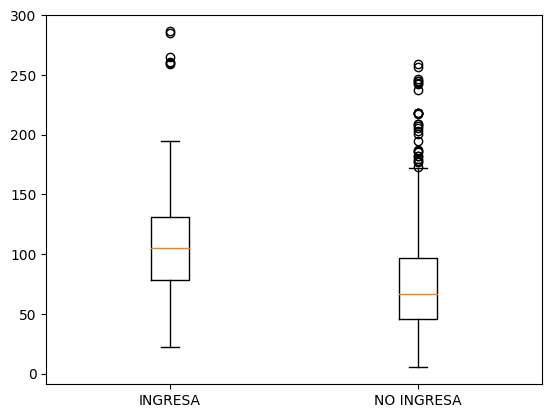

In [38]:
# Se visualiza los resultados del puntaje total por ingresantes y no ingresantes
plt.boxplot( df[df.OBSERVACION=='INGRESA']['PTJE TOTAL'], positions=[1] )
plt.boxplot( df[df.OBSERVACION=='NO INGRESA']['PTJE TOTAL'], positions=[2])

plt.xticks([1,2], labels=['INGRESA', 'NO INGRESA'])
plt.show()

<Axes: xlabel='PTJE TOTAL', ylabel='OBSERVACION'>

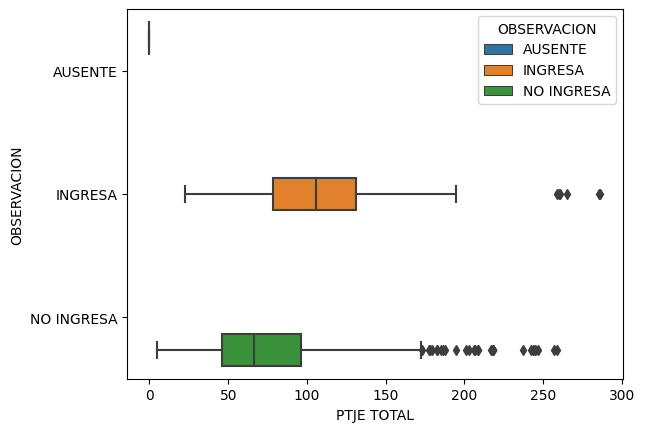

In [39]:
# Obteniendo el mismo boxplot con la librería de seaborn
sns.boxplot(data=df, x='PTJE TOTAL', y='OBSERVACION', hue='OBSERVACION')

#### Tarea 2
Descripción de medidas de tendencial central y variabilidad por escuela de interés...

In [40]:
# Se define una función que retorna un dataFrame filtrada por el nombre de la escuela y la observacion
def escuelaYobservacion(df, nombre_escuela, obs='INGRESA'):
  return df[(df['ESCUELA']==nombre_escuela) & (df['OBSERVACION']==obs)]

# escuelaYobservacion(df, 'ADMINISTRACION')

In [41]:
# Obtener las mismas medidas por una escuela de interés
nombre_escuela = 'ADMINISTRACION'
estado = 'INGRESA'

display(HTML(nombre_escuela + ' / ' + estado))

# Almacenando las medidas de la escuela de interés del proceso de admisión
esc_apt = medidas(escuelaYobservacion(df, nombre_escuela, estado)['PTJE APT ACADEM'])
esc_con = medidas(escuelaYobservacion(df, nombre_escuela, estado)['PTJE CONOC.'])
esc_tot = medidas(escuelaYobservacion(df, nombre_escuela, estado)['PTJE TOTAL'])

#display(HTML('<h4>Aptitud académica</h4>'))
#display(esc_apt)
#display(HTML('<h4>Conocimientos</h4>'))
#display(esc_con)
display(HTML('<h4>Apt + Con</h4>'))
display(esc_tot)

,Medida,Valor
0,Cuenta,5.0000
1,Mín,111.0380
2,Media,129.9956
3,Mediana,127.3730
4,Máx,165.0000
5,Varianza,453.5379
6,DesEst,21.2964
7,CoefVar,0.1638


In [42]:
# Filtrando el dataFrame por la escuela de ADMINISTRACION
# display(df[(df['ESCUELA']=='ADMINISTRACION')])

# Filtrando el dataFrame por la escuela de ADMINISTRACION y postulantes que han INGRESADO
# display(df[  (df['ESCUELA']=='ADMINISTRACION') & (df['OBSERVACION']=='INGRESA')    ])

NO INGRESA    23
INGRESA        5
AUSENTE        0
Name: OBSERVACION, dtype: int64

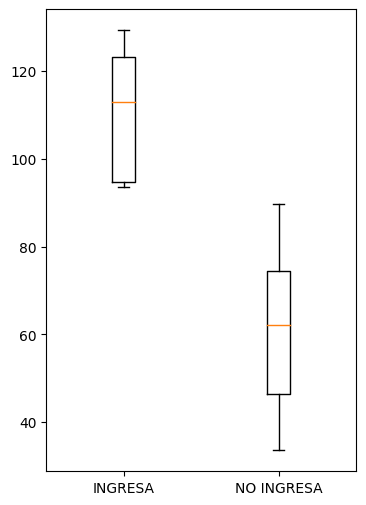

In [43]:
nombre_escuela = 'ING.INDUSTRIAL' # Se indica la escuela de interés
estado_in = 'INGRESA'
estado_off = 'NO INGRESA'

df_escuela = df['ESCUELA']==nombre_escuela

p = df[ (df_escuela) & ( df['OBSERVACION']==estado_in) ] # Filtrando el df por escuela y el estado igual a INGRESA
q = df[ (df_escuela) & ( df['OBSERVACION']==estado_off) ] # Filtrando el df por escuela y el estado igual a NO INGRESA

# display(df[df_escuela])
display(df[df_escuela].OBSERVACION.value_counts()) # Contando la cantidad de ingresantes, no ingresantes y ausentes de la escuela

fig = plt.figure(figsize =(4,6))
p_box = plt.boxplot(p['PTJE TOTAL'], positions=[1]) # Solo se considera el campo del puntaje total
q_box = plt.boxplot(q['PTJE TOTAL'], positions=[2]) # Solo se considera el campo del puntaje total

plt.xticks([1,2], labels=['INGRESA', 'NO INGRESA'], fontsize=10)
plt.show()

<Axes: xlabel='OBSERVACION', ylabel='PTJE TOTAL'>

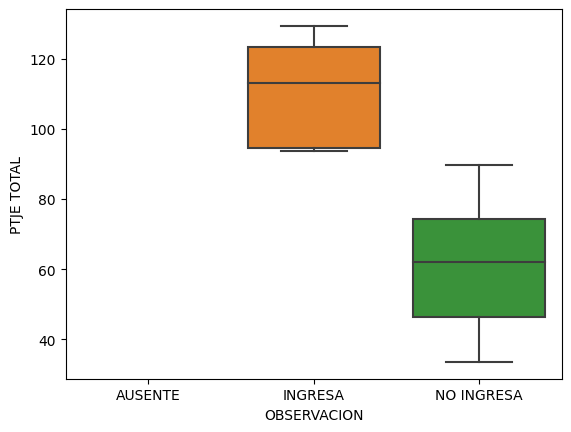

In [44]:
# Obteniendo el mismo gráfico que el anterior...
sns.boxplot(data=df[df['ESCUELA']=='ING.INDUSTRIAL'], x='OBSERVACION', y='PTJE TOTAL')

#### Tarea 3
Se procede a obtener una tabla que muestre la cantidad de postulantes por escuela, la proporción de ingresantes y no ingresantes...

In [45]:
# Solo obtenemos el index, es decir, los nombres de las escuelas y lo convertimos a una serie de Pandas
Escuelas = pd.Series(df['ESCUELA'].value_counts().index)
# display(Escuelas)

In [46]:
# Cantidad de escuelas
print("Cantidad de escuelas:", len(Escuelas))

Cantidad de escuelas: 40


In [47]:
# Cantidad de postulantes por escuela
freq = df['ESCUELA'].value_counts()
freq

MEDICINA               141
DERECHO Y CC.PP.        47
ING.CIVIL               41
ING.DESISTEMAS          30
ING.INDUSTRIAL          28
ARQUITECTURA Y URB      27
CONTABIL. Y FINAN.      27
ESTOMATOLOGIA           22
ADMINISTRACION          21
ING.MECATRONICA         18
FARMACIA Y BBQQ.        18
ENFERMERIA              13
ING.DEMINAS             11
INFORMATICA              8
ED.SEC:LENGUA            8
ING.AGRONOMICA           8
EDUCACIONINICIAL         7
ING.AMBIENTAL            6
ECONOMIA                 6
ING.QUIMICA              6
MICROBIOL. Y PARAS.      6
TRABAJOSOCIAL            6
ING.AGRICOLA             4
ESTADISTICA              4
ED.SEC:IDIOMAS           4
CCAS.COMUNICACION        4
ING.MECANICA             4
ING.AGROINDUSTRIAL       4
BIOLOGIAPESQUERA         3
ING.DEMATERIALES         3
ARQUEOLOGIA              2
MATEMATICAS              2
CCAS.BIOLOGICAS          2
CC.POLITICA Y GOB.       2
ING.METALURGICA          2
ED.SEC:HISTORIA          1
ED.SEC:FILOSOFIA         1
E

In [48]:
# Convertiendo la Serie de Pandas a un DataFrame
df_escuela = pd.DataFrame(freq)
# display(df_escuela)

df_escuela.rename(columns={'ESCUELA':'Postulantes'}, inplace=True) # Renombrando el campo a Postulantes
df_escuela.sort_index(inplace=True) # Se ordena el df_escuela por el indice
# display(df_escuela)

In [49]:
# Filtrando el dataFrame para obtener solo a aquellos que han ingresado
df[df['OBSERVACION']=='INGRESA']

,ID,APELLIDOS Y NOMBRES,PTJE APT ACADEM,PTJE CONOC.,PTJE TOTAL,NOTA MINIMA,ESCUELA,OBSERVACION
0,2968,CORDOVA POLO ANGIE ELIZABETH,77.324,87.676,165.000,90.511,ADMINISTRACION,INGRESA
1,4577,CHACON ESCOBEDO GREICY LISET,40.688,90.734,131.422,90.511,ADMINISTRACION,INGRESA
2,6472,AVILA CABANILLAS MARC ANYELO,31.529,95.844,127.373,90.511,ADMINISTRACION,INGRESA
3,4779,VIVAS ETO SHOSUKE JULIOMANUEL,32.554,82.591,115.145,90.511,ADMINISTRACION,INGRESA
4,5005,HOYOS TERRONES JAKORI NAYELI,35.599,75.439,111.038,90.511,ADMINISTRACION,INGRESA
...,...,...,...,...,...,...,...,...
539,7275,CABEZA ECHEANDIA KEISI GERALDINE,26.446,43.838,70.284,60.969,ED.SEC:LENGUA,INGRESA
540,3298,ROJAS HERMENEGILDO ANYELA ROCIO,17.287,48.928,66.215,60.969,ED.SEC:LENGUA,INGRESA
545,7508,PINCO VILLANUEVA DIANA KIMBERLY,54.942,74.433,129.375,81.724,ED.SEC:IDIOMAS,INGRESA
546,777,VEREAU PASHANASI LESLIE ARIANA,60.025,47.902,107.927,81.724,ED.SEC:IDIOMAS,INGRESA


In [50]:
# Contar por escuela cuántos ingresantes se obtuvieron
ingresantes = df['ESCUELA'][df['OBSERVACION']=='INGRESA'].value_counts()

# Se ordena por el index
ingresantes.sort_index()

ingresantes

ADMINISTRACION         5
EDUCACIONINICIAL       5
MEDICINA               5
ING.MECATRONICA        5
ING.INDUSTRIAL         5
ING.DESISTEMAS         5
ING.CIVIL              5
ENFERMERIA             5
FARMACIA Y BBQQ.       5
ARQUITECTURA Y URB     5
DERECHO Y CC.PP.       5
CONTABIL. Y FINAN.     5
ING.AGRONOMICA         4
ED.SEC:LENGUA          4
INFORMATICA            4
TRABAJOSOCIAL          3
MICROBIOL. Y PARAS.    3
ING.QUIMICA            3
ING.DEMINAS            3
ESTOMATOLOGIA          3
ING.AMBIENTAL          3
ING.AGROINDUSTRIAL     2
ECONOMIA               2
ING.AGRICOLA           2
ED.SEC:IDIOMAS         2
ESTADISTICA            2
BIOLOGIAPESQUERA       1
ED.SEC:HISTORIA        1
ED.SEC:MATEMATICA      1
MATEMATICAS            1
EDUCACIONPRIMARIA      1
ING.METALURGICA        1
ING.MECANICA           1
ED.SEC:FILOSOFIA       1
CC.POLITICA Y GOB.     1
CCAS.BIOLOGICAS        1
ING.DEMATERIALES       1
CCAS.COMUNICACION      1
ARQUEOLOGIA            1
TURISMO                1


In [51]:
# Se agrega al df un campo de la cantidad de ingresantes por escuela
df_escuela['Ingresantes'] = ingresantes
df_escuela

,Postulantes,Ingresantes
ADMINISTRACION,21,5
ARQUEOLOGIA,2,1
ARQUITECTURA Y URB,27,5
BIOLOGIAPESQUERA,3,1
CC.POLITICA Y GOB.,2,1
CCAS.BIOLOGICAS,2,1
CCAS.COMUNICACION,4,1
CONTABIL. Y FINAN.,27,5
DERECHO Y CC.PP.,47,5
ECONOMIA,6,2


In [52]:
# Agregando un campo para la cantidad de no ingresantes
df_escuela['No ingresantes'] = df_escuela.Postulantes - df_escuela.Ingresantes
df_escuela

,Postulantes,Ingresantes,No ingresantes
ADMINISTRACION,21,5,16
ARQUEOLOGIA,2,1,1
ARQUITECTURA Y URB,27,5,22
BIOLOGIAPESQUERA,3,1,2
CC.POLITICA Y GOB.,2,1,1
CCAS.BIOLOGICAS,2,1,1
CCAS.COMUNICACION,4,1,3
CONTABIL. Y FINAN.,27,5,22
DERECHO Y CC.PP.,47,5,42
ECONOMIA,6,2,4


In [53]:
# Ordenando por la cantidad de Postulantes
df_escuela.sort_values(by='Postulantes', ascending=False, inplace=True)

Se procede a elaborar un gráfico que muestre la cantidad de ingresantes y no ingresantes por escuela. También, se indica la proporción de ingresantes y no ingresantes por la escuela de interés

In [54]:
# Se crea una función que requiere el dataFrame y el nombre de escuela de interés
def escuela_seleccionada(df, nombre_escuela):
  df_escuela_selected = df.loc[[nombre_escuela]] # Obtenemos el registro de la escuela seleccionada

  p_escuela = df_escuela_selected.iloc[0,0] # Cantidad de postulantes de escuela seleccionada
  p_ingresa = round(df_escuela_selected.iloc[0,1] / df_escuela_selected.iloc[0,0], 4) # Proporción de ingresantes
  p_NOingresa= round(df_escuela_selected.iloc[0,2] / df_escuela_selected.iloc[0,0], 4) # Proporción de no ingresantes

  display(df_escuela_selected)

  print("\nPropoción de ingresantes:", p_ingresa)
  print("Propoción de NO ingrensantes:", p_NOingresa)

  # figure: bar
  df_escuela_selected.plot(kind='bar', figsize=(8,4))
  plt.grid(axis='y', alpha=.4)
  plt.legend(loc='upper right', fontsize=8)
  plt.xticks(rotation=0)
  plt.show()

,Postulantes,Ingresantes,No ingresantes
MEDICINA,141,5,136



Propoción de ingresantes: 0.0355
Propoción de NO ingrensantes: 0.9645


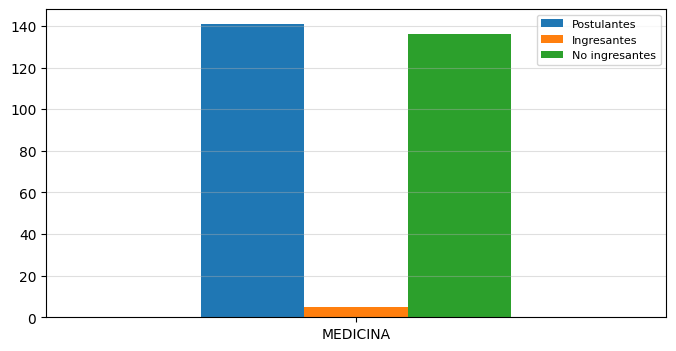

In [55]:
escuela_seleccionada(df_escuela, 'MEDICINA')

#### Tarea 4

Determinando las carreras con la mayor proporción de no ingresantes...

In [56]:
# Se muestra la proporción de ingresantes por escuela
df_escuela_copia = df_escuela.copy() # Se realiza una copia del df
df_escuela_copia['Ingresantes'] = round(df_escuela_copia['Ingresantes'] / df_escuela_copia.Postulantes, 5)
df_escuela_copia['No ingresantes'] = round(df_escuela_copia['No ingresantes'] / df_escuela_copia.Postulantes, 5)
# df_escuela_copia

In [57]:
# Mostrando las 10 carreras donde la proporción de no ingresantes es elevada
df_escuela_copia.sort_values(by='No ingresantes', ascending=False).head(10)

,Postulantes,Ingresantes,No ingresantes
MEDICINA,141,0.03546,0.96454
DERECHO Y CC.PP.,47,0.10638,0.89362
ING.CIVIL,41,0.12195,0.87805
ESTOMATOLOGIA,22,0.13636,0.86364
ING.DESISTEMAS,30,0.16667,0.83333
ING.INDUSTRIAL,28,0.17857,0.82143
ARQUITECTURA Y URB,27,0.18519,0.81481
CONTABIL. Y FINAN.,27,0.18519,0.81481
ADMINISTRACION,21,0.23810,0.76190
CCAS.COMUNICACION,4,0.25000,0.75000


La carrera más demandada (Medicina) es la que presenta la mayor proporción de no ingresantes con un valor de 0.9645; seguida por Derecho, 0.8936; Ingeniería Civil, 0.8780; Estomatología, 0.86364; Ingeniería de Sistemas, 0.8333 y así sucesivamente.